importing packages


In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

loading dataset

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
#load_data has two return values train and test data
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
# shape will return in the form of (no.of images,size,size) here there are 60000 images with the size of 28*28

(60000, 28, 28)


In [4]:
print(test_digits.shape)
print(train_labels.shape)
print(test_labels.shape)

(10000, 28, 28)
(60000,)
(10000,)


In [5]:
#no of images for each class
type(train_labels)

numpy.ndarray

In [6]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

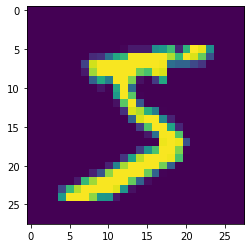

In [8]:
#display
plt.imshow(train_digits[0])

Text(0.5, 1.0, 'Digit 5')

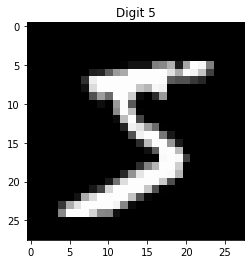

In [9]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit "+ str(train_labels[0]))

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

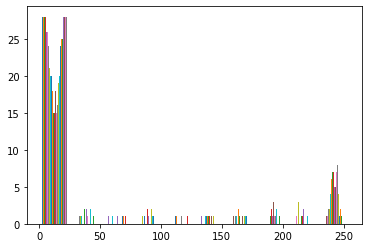

In [10]:
plt.hist(train_digits[0])

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

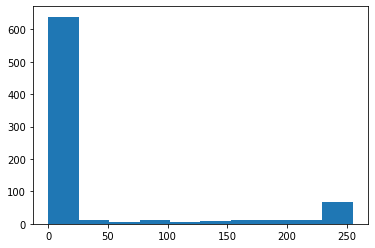

In [11]:
#pexel distribution for different classes 
plt.hist(train_digits[0].flat)

(array([638.,  13.,   3.,   7.,  13.,   8.,  17.,  12.,   9.,  64.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

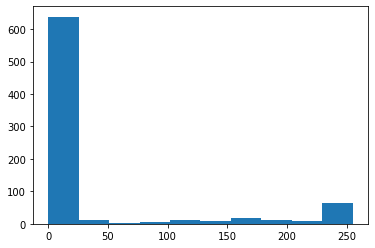

In [12]:
plt.hist(train_digits[17].flat)

In [13]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [14]:
samples=np.random.randint(train_digits.shape[0],size=16)
samples

array([31991, 27347, 49476, 24925, 17917, 37019, 45492, 44682, 58673,
       34378, 14907, 21534, 52943, 30751, 29074, 53711])

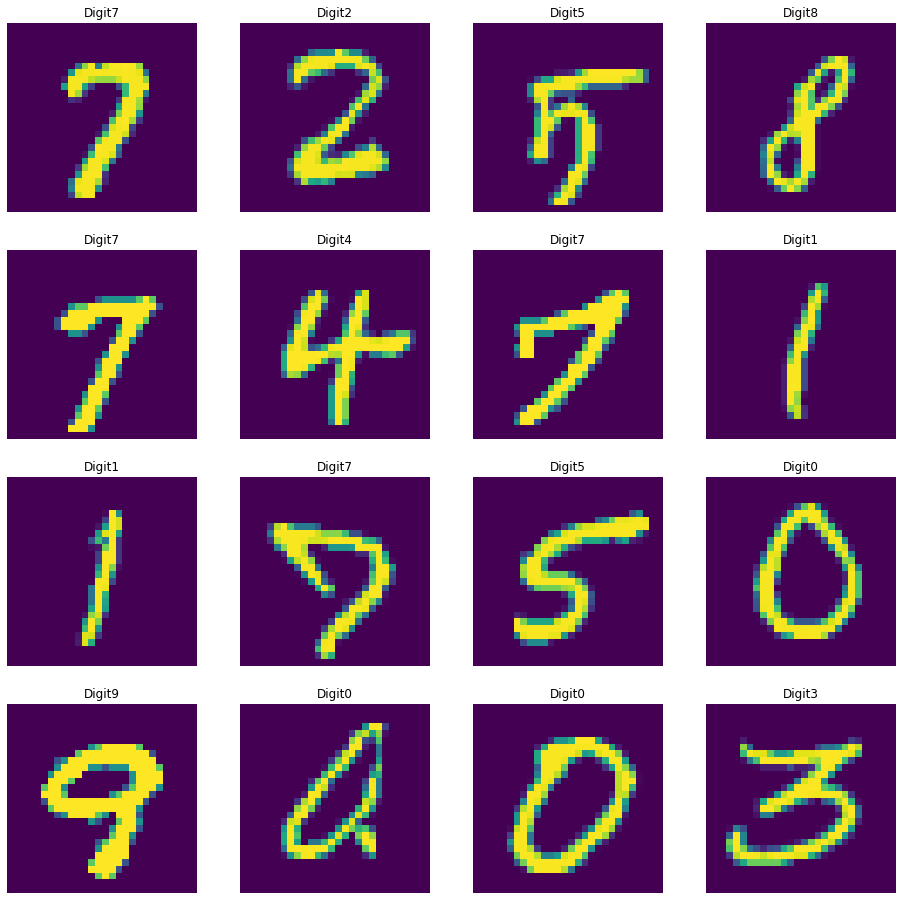

In [15]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit" +str(train_labels[i]))
  plt.axis('off')
  j+=1

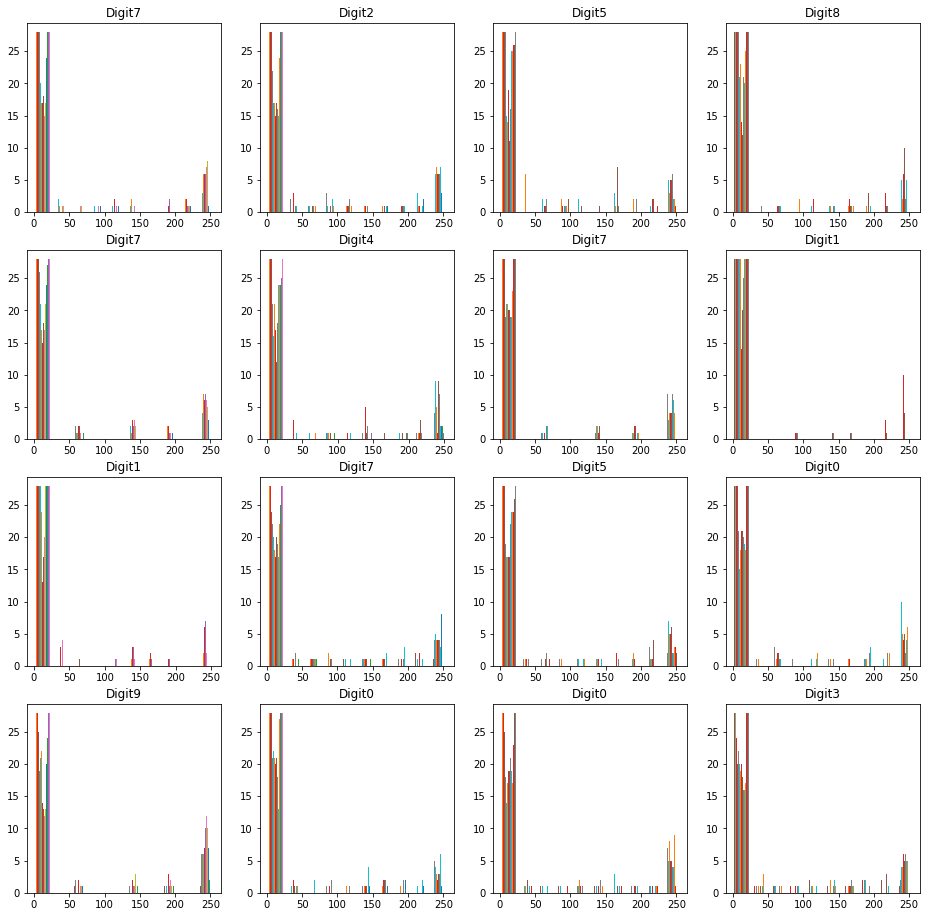

In [16]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i])
  plt.title("Digit" +str(train_labels[i]))

  j+=1

In [17]:
# scaling
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [18]:
from keras.utils import to_categorical
train_labels_cat=to_categorical(train_labels) # convert lables to categorical
test_labels_cat=to_categorical(test_labels)

In [19]:
print(train_labels_cat)
print(test_labels_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
#spliting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.2,random_state=32)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 28, 28)
(48000, 10)
(12000, 28, 28)
(12000, 10)


In [21]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [27]:
## Creating the skeleton
model = Sequential()
# Add first layer, we need to mention input shape for first layer
model.add(Flatten(input_shape=(28,28)))

# Adding the number of neurons in the sencond layer
model.add(Dense(128, activation='relu')) # Input shape=784 * Number of neurons in the firstlayer(128) + bias(128) = 100480
model.add(Dense(164, activation='relu')) # Input is output of first hidden layer(128) * Number of neurons in 2nd hidden layer(128) + 128
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))   


##Final Layer
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 164)               21156     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               21120     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 178,350
Trainable params: 178,350
Non-trainable params: 0
________________________________________________

In [29]:
#compiling model
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [31]:
# training the data
history=model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_val,y_val),batch_size=32)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 151us/step - loss: 0.2576 - accuracy: 0.9205 - val_loss: 0.1542 - val_accuracy: 0.9536
Epoch 2/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.1172 - accuracy: 0.9641 - val_loss: 0.1111 - val_accuracy: 0.9680
Epoch 3/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.0843 - accuracy: 0.9739 - val_loss: 0.1081 - val_accuracy: 0.9709
Epoch 4/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.0676 - accuracy: 0.9787 - val_loss: 0.1069 - val_accuracy: 0.9693
Epoch 5/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.1013 - val_accuracy: 0.9728
Epoch 6/10
48000/48000 [==============================] - 7s 143us/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.1111 - val_accuracy: 0.9724
Epoch 7/10
48000/48000 [==============================] - 7s 1

In [32]:
#testing the data
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 33us/step


[0.11806599482363672, 0.9742000102996826]

In [34]:
history.history

{'accuracy': [0.92054164,
  0.964125,
  0.973875,
  0.9787083,
  0.98270833,
  0.9851458,
  0.9875625,
  0.98889583,
  0.9905,
  0.9911875],
 'loss': [0.25759679173119365,
  0.11720944870108117,
  0.08429459617581839,
  0.067595443010369,
  0.055665330277270796,
  0.04633555005458281,
  0.04031098963328865,
  0.03552136932999929,
  0.030681469716171098,
  0.029851485715018496],
 'val_accuracy': [0.9535833597183228,
  0.9679999947547913,
  0.9709166884422302,
  0.9692500233650208,
  0.9728333353996277,
  0.9724166393280029,
  0.9702500104904175,
  0.9745833277702332,
  0.9744166731834412,
  0.9698333144187927],
 'val_loss': [0.15420035767927767,
  0.11114485709493359,
  0.10810110387803676,
  0.10694700087436164,
  0.10130248885504746,
  0.11106606356050663,
  0.12820447143696947,
  0.109932940168054,
  0.105400323030112,
  0.13684573825697105]}

In [35]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

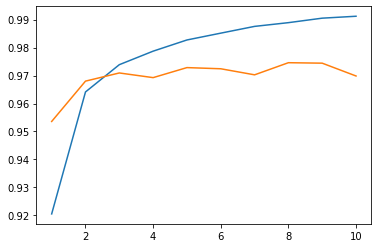

In [37]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])

In [38]:
#prediction
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [41]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])